# OpenCEM Post Processing
A set of tools for visualising data outputted by [openCEM](github.com/openCEMorg/openCEM). 

## Dependencies
See README.md for installation instructions

## Generate a .db File 
.db files are generated by calling the `generate_db.py` script contained in the main cemo outputs directory. 
Calling this script will read in the JSON file specified by the json_path and json_name in CONFIG file and produce a .db file with the path specified in the CONFIG file. This can be a time intensive process and may take 20-30 minutes depending upon the speed of your machine. 

Ensure before each database file is generated that another file with the same filename does not exist in the directory being saved to. Otherwise incorrect data will be generated and processed. This can be avoided by deleting or changing the name of the exisiting file. 

## Generating a Report
Once the .db file has been generated reports can also be generated. This is done by calling the `autoreporting.py` script contained in the main cemo_outputs directory. This will generate a folder with the same name as the JSON file and save a HTML report with associated files. 

Depending upon the specific scenario being modelled, not all data may be available to produce all plots and tables within the report. If this is the case, text will instead be generated to describe this.  

## Detailed Processing

More detailed processing can be achieved through direct use of the plotting classes. These are contained in the Processing subfolder. There are two main classes: OutputsAnimator and OutputsPlotter. There are within the `animating.py` and `plotting.py` files, respectively. 

Theese must be called from within the main directory; cemo_outputs and not the Processing subdirectory.  
### Custom Animations
These can be produced using the OutputsAnimator class. From within the main repo directory this can be done as follows:

In [3]:
#import animating class
from processing.animating import OutputsAnimator

#initalise animator class
animator = OutputsAnimator()

#specify start date
start_date = '23/4/2030'
#specify days to animate for
num_days = 3
#generate animation
animator.main(start_date, num_days)

This the oututs the animation as a gif file to the Animation subfolder. 

An important thing to note when specifying dates is that the model treats years as financial rather than calendar years. For example for the year '2030', the dates specified must fall within the range of '2029-07-01' and '2030-06-30.'

Additionally, the functions used to parse dates will favour American formats. The data '3/12/2030' will be interpreted as the 12th of March rather than the 3rd of December. 

### Custom Plots
Custom plots of both a generation slice or the yearly capacity and generation can be produced using the OutputsAnimator class. In this case, the data also needs to be loaded using the SqlFile class. 

In [1]:
#import plotting class
from processing.plotting import OutputsPlotter
#import sql data class
from processing.loader import SqlFile

#load the model data
model_data = SqlFile()
model_data.load_all_data()

#initialise plotting class
plotter = OutputsPlotter()

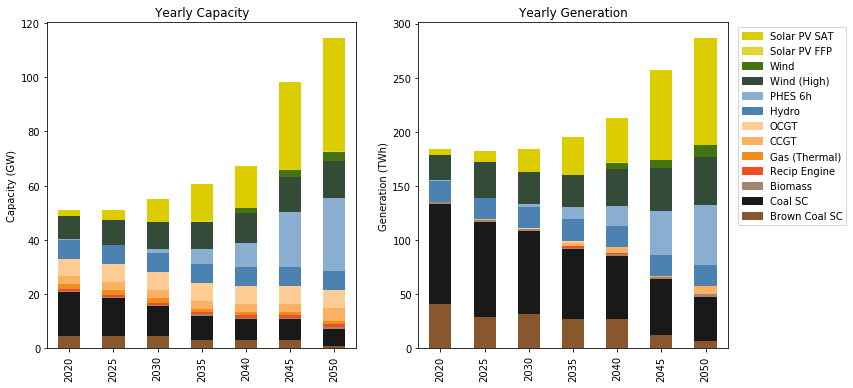

In [2]:
#plotting yearly capacity and generation data
plotter.plot_yearly_cap(model_data)

This plot can also be made specific to either the state or ntndp zone id. The state should be inputted as a string as one of 'QLD', 'NSW', 'SA', 'VIC' or 'TAS'. The ntndp zone id should be inputted as an integer between 1 and 16. For example:

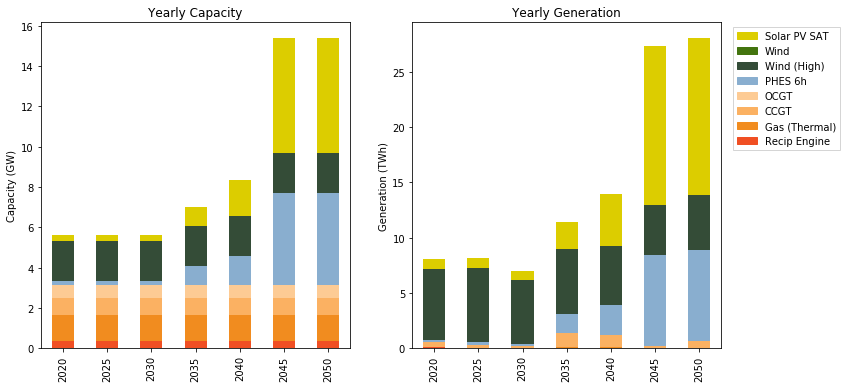

In [3]:
plotter.plot_yearly_cap(model_data, 'SA')

Plotting of the generation slice also has the option to be made region specific, using the same method. This plot also requires a start date and number of days to specified as shown below:

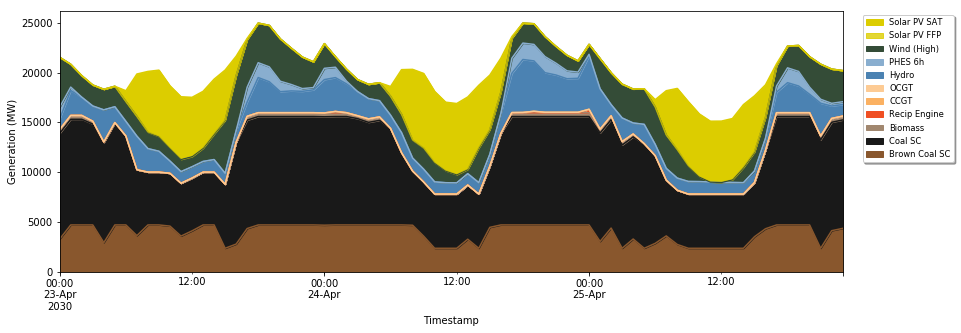

In [4]:
#specify start date
start_date = '23/4/2030'
#specify days to animate for
num_days = 3
#make plot
plotter.plot_generation_slice(model_data, start_date, num_days)

And when specifying the region:

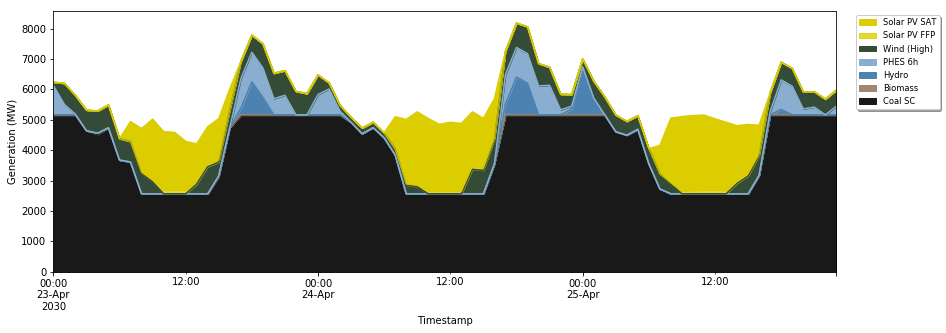

In [5]:
plotter.plot_generation_slice(model_data, start_date, num_days, 'NSW')